# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE

In [2]:
# Replace this by fma_data
data_dir = '../fma_data/'
genre_clean_data_loc = data_dir + 'genre.csv'
features = ['zero_crossing_rate', 'spectral_centroid', 'spectral_rolloff',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13']
n_components = 3

In [3]:
# Reading in the data
df = pd.read_csv(genre_clean_data_loc)

In [4]:
# Taking a look at the data
df.head()

files  zero_crossing_rate  spectral_centroid  \
0   <DirEntry '85957.mp3'>            0.057728        1529.957976   
1   <DirEntry '18144.mp3'>            0.080369        2427.669513   
2  <DirEntry '127183.mp3'>            0.090596        1834.378512   
3  <DirEntry '119592.mp3'>            0.055481        1532.465878   
4   <DirEntry '51265.mp3'>            0.071954        1881.222427   

   spectral_rolloff      mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0       3161.828131  -64.337242  121.530136   2.352386  30.264349   0.554661   
1       5554.774744  -62.579075   81.369446  12.634321  35.640652  14.768589   
2       3686.677707  -11.729009  120.153786 -28.788065  31.547325   4.734121   
3       3226.586195 -288.456390  109.652512  22.016607  42.787487  -1.556436   
4       3743.377364 -120.218933  109.344826 -25.746342  34.304729  19.489794   

      mfcc_6    mfcc_7     mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12  \
0   7.781406 -6.125121   4.579480 -8.715683  5.371177 -6.889459 -1.765473   
1  16.311016  4.306047   7.292131  1.529289  2.874582 -4.394399  1.882002   
2   5.481470 -1.632542   5.459340 -5.194065  1.667842 -2.029418  7.400634   
3   4.490634 -4.202720 -10.597934  3.760007 -0.519888  0.375547  0.929607   
4   4.089856  6.571891  17.365267 -3.853266  9.050344  1.017238  3.713104   

    mfcc_13 labels  
0 -9.856883    Pop  
1 -6.025087    Pop  
2 -1.576792    Pop  
3 -8.156875    Pop  
4 -1.092134    Pop

In [5]:
# Looking at some descriptive statistics
df.describe()

zero_crossing_rate  spectral_centroid  spectral_rolloff       mfcc_1  \
count         7994.000000        7994.000000       7994.000000  7994.000000   
mean             0.083961        1888.791064       3896.746618  -135.112023   
std              0.044472         704.183465       1555.096603   104.913395   
min              0.000082         194.354333        243.415195 -1127.743286   
25%              0.053510        1385.100444       2772.460319  -193.314713   
50%              0.076550        1874.542762       3954.609420  -119.146660   
75%              0.105225        2352.209188       4972.988679   -60.863481   
max              0.816193        6725.584633       9453.101172   171.462128   

            mfcc_2       mfcc_3       mfcc_4       mfcc_5       mfcc_6  \
count  7994.000000  7994.000000  7994.000000  7994.000000  7994.000000   
mean    111.376074    -2.914132    26.889335     2.504438     8.216943   
std      37.508392    25.956400    15.425242    12.566628    10.683170   
min     -94.775452  -127.413918   -74.808945   -70.022697   -58.030579   
25%      86.010323   -18.458471    18.642332    -4.256569     2.526567   
50%     107.628792    -1.478755    27.194486     3.451144     9.032796   
75%     133.207401    13.355523    35.941252    10.446565    15.042120   
max     272.954865   123.061836   113.804977    61.160206    56.114937   

            mfcc_7       mfcc_8       mfcc_9      mfcc_10      mfcc_11  \
count  7994.000000  7994.000000  7994.000000  7994.000000  7994.000000   
mean     -1.949378     3.834402    -4.131794     2.318131    -4.404138   
std       8.772182     8.834031     7.447179     7.351186     6.770809   
min     -49.893021   -47.326214   -56.568249   -55.678890   -45.419838   
25%      -6.797903    -0.964281    -8.421921    -1.825497    -8.314371   
50%      -1.420270     4.814119    -3.711001     3.111443    -3.902901   
75%       3.429543     9.707707     0.681295     7.214539    -0.037592   
max      44.812984    39.906776    31.360687    39.575729    35.043846   

           mfcc_12      mfcc_13  
count  7994.000000  7994.000000  
mean      1.287028    -4.365675  
std       6.480430     5.836893  
min     -41.220505   -32.403660  
25%      -2.386229    -7.801928  
50%       1.894445    -4.061323  
75%       5.612568    -0.608809  
max      26.462307    26.704849

## Correlation among each other

In [6]:
def generate_correlation_matrix(df):
    sns.heatmap(df.corr())

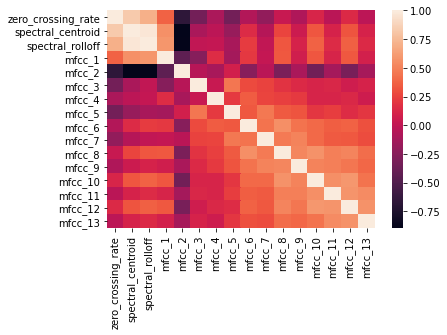

In [7]:
generate_correlation_matrix(df)

## PCA on Numeric Data

In [8]:
def generate_2D_PCA_plots(df, features, n_components):
    pca = PCA(n_components=n_components)
    transformed_df = df[features]
    components = pca.fit_transform(transformed_df)
    labels = {
        str(i): f"PC {i+1} ({var:.1f}%)"
        for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }

    fig = px.scatter_matrix(
        components,
        labels=labels,
        dimensions=range(n_components),
        color=df["labels"]
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()

In [9]:
generate_2D_PCA_plots(df, features, n_components)

In [45]:
def generate_3D_PCA_plots(df, features, n_components):
    pca = PCA(n_components=n_components)
    transformed_df = df[features]
    components = pca.fit_transform(transformed_df)
    total_var = pca.explained_variance_ratio_.sum() * 100
    fig = px.scatter_3d(
        components, x=0, y=1, z=2, color=df['labels'],
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
    fig.show()

In [46]:
generate_3D_PCA_plots(df, features, n_components)

## TSNE on Numeric Data

In [53]:
def generate_2D_tsne(df, features, n_components):
    tsne = TSNE(n_components=n_components, verbose=1, perplexity=40, n_iter=300)
    transformed_df = df[features]
    tsne_results = tsne.fit_transform(transformed_df)
    
    df_tsne = pd.DataFrame()
    df_tsne['tsne-2d-one'] = tsne_results[:,0]
    df_tsne['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=df['labels'],
        palette=sns.color_palette("hls", 8),
        data=df_tsne,
        legend="full",
        alpha=0.3
    )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7994 samples in 0.029s...
[t-SNE] Computed neighbors for 7994 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7994
[t-SNE] Computed conditional probabilities for sample 2000 / 7994
[t-SNE] Computed conditional probabilities for sample 3000 / 7994
[t-SNE] Computed conditional probabilities for sample 4000 / 7994
[t-SNE] Computed conditional probabilities for sample 5000 / 7994
[t-SNE] Computed conditional probabilities for sample 6000 / 7994
[t-SNE] Computed conditional probabilities for sample 7000 / 7994
[t-SNE] Computed conditional probabilities for sample 7994 / 7994
[t-SNE] Mean sigma: 28.938726
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.321175
[t-SNE] KL divergence after 300 iterations: 1.747232


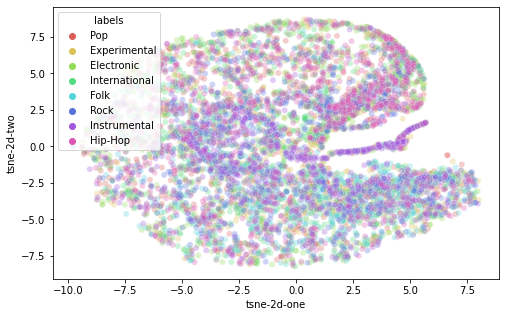

In [54]:
generate_2D_tsne(df, features, n_components)